In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

# plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import FinanceDataReader as fdr

**시작**과 **끝** 날짜를 지정하여 범위 데이터를 가져올 수 있습니다.

In [3]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
# ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

지난 주식 예측 튜토리얼에서는 **삼성전자** 주가데이터로 실습을 해봤으니, 

이번에는 글로벌 증시의 대장주인 **Apple**사의 주가데이터를 가져와서 예측해 보도록 하겠습니다.

In [4]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [5]:
stock = fdr.DataReader(STOCK_CODE)

In [6]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-08,1680,1751,1680,1702,380690,NaN
1999-02-09,1682,1698,1657,1675,381820,-0.015864
1999-02-10,1653,1675,1604,1634,664282,-0.024478
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219


In [7]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-05-18,66000,66200,65700,66200,14431704,0.018462
2023-05-19,67800,68400,67500,68400,20349345,0.033233
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68400,68000,68300,1465777,-0.001462


In [8]:
stock.index

DatetimeIndex(['1999-02-08', '1999-02-09', '1999-02-10', '1999-02-11',
               '1999-02-12', '1999-02-18', '1999-02-19', '1999-02-22',
               '1999-02-23', '1999-02-24',
               ...
               '2023-05-11', '2023-05-12', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

위에서 보시는 바와 같이 index가 `DatetimeIndex`로 지정되어 있습니다.

`DatetimeIndex`로 정의되어 있다면, 아래와 같이 연도, 월, 일을 쪼갤 수 있으며, **월별, 연도별 피벗데이터**를 만들때 유용하게 활용할 수 있습니다.

In [9]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [10]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1999-02-08,1680,1751,1680,1702,380690,NaN,1999,2,8
1999-02-09,1682,1698,1657,1675,381820,-0.015864,1999,2,9
1999-02-10,1653,1675,1604,1634,664282,-0.024478,1999,2,10
1999-02-11,1661,1678,1643,1644,287590,0.006120,1999,2,11
1999-02-12,1682,1751,1667,1743,403600,0.060219,1999,2,12


## 시각화

Text(0, 0.5, 'price')

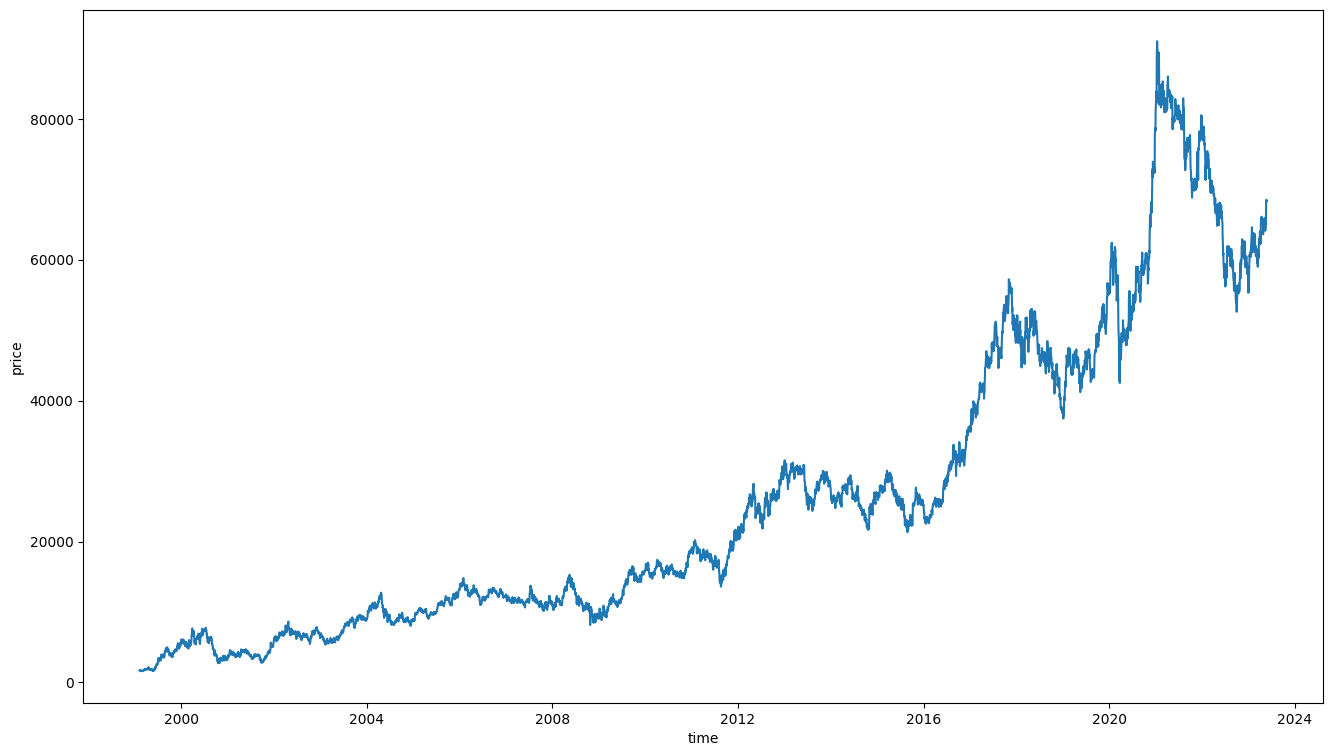

In [11]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

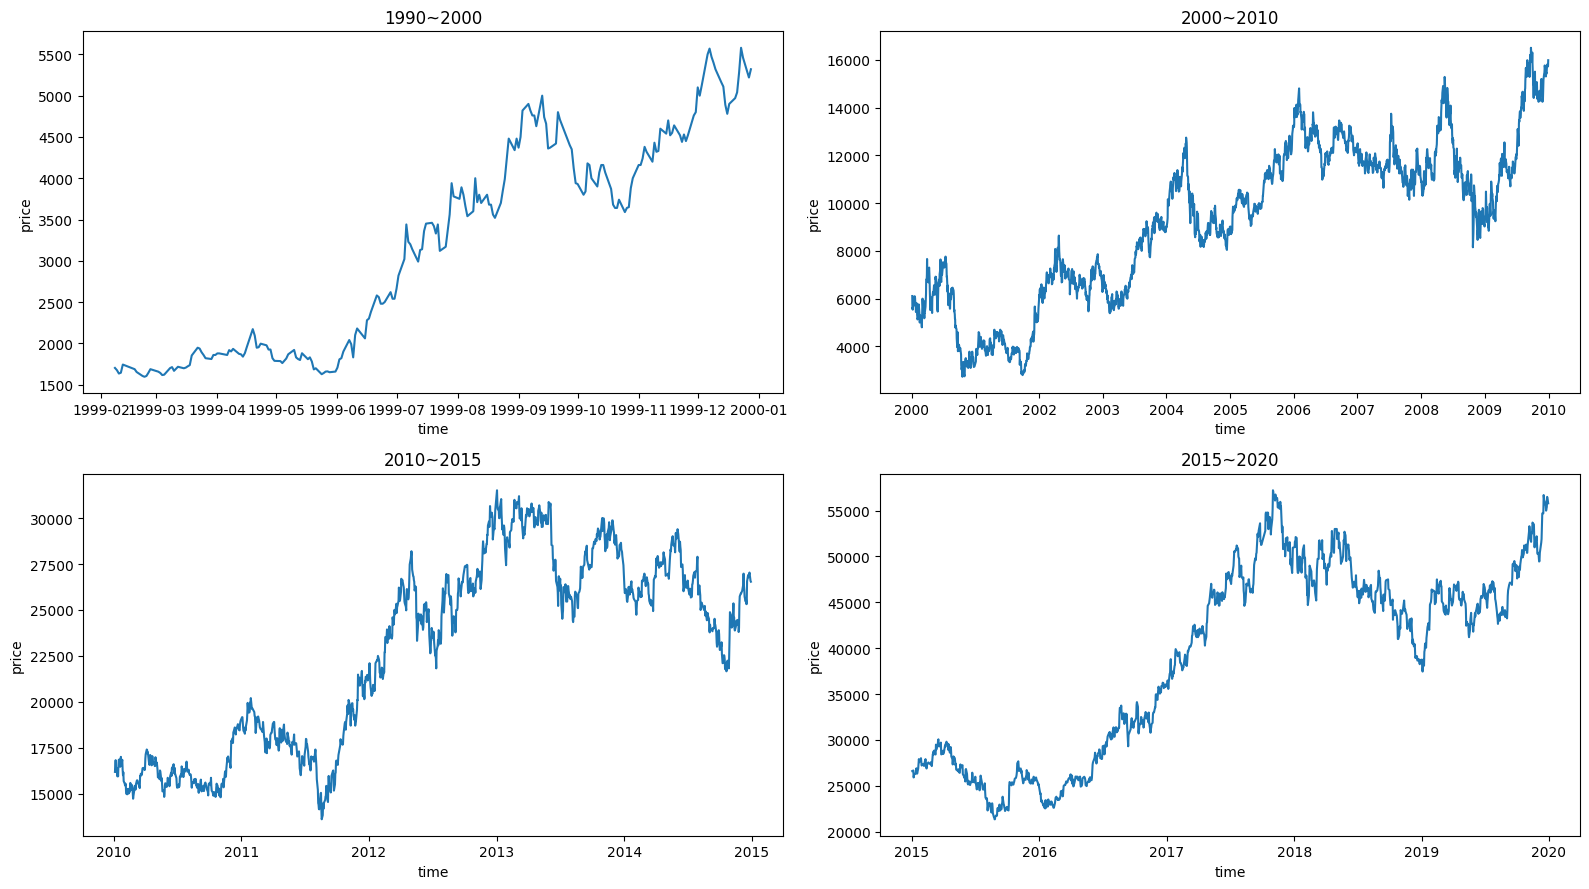

In [12]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## 데이터 전처리

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[1.86046512e-02, 1.80888430e-02, 1.87709497e-02, 1.19680107e-03,
        4.21554774e-03],
       [1.86267996e-02, 1.75413223e-02, 1.85139665e-02, 8.94804541e-04,
        4.22806072e-03],
       [1.83056478e-02, 1.73037190e-02, 1.79217877e-02, 4.36217214e-04,
        7.35588663e-03],
       ...,
       [7.57475083e-01, 7.12809917e-01, 7.59776536e-01, 7.48336223e-01,
        1.60236082e-01],
       [7.58582503e-01, 7.09710744e-01, 7.60893855e-01, 7.47217717e-01,
        9.48068370e-02],
       [7.54152824e-01, 7.06611570e-01, 7.59776536e-01, 7.46099211e-01,
        1.62311931e-02]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 제외했습니다.

*6,000개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [14]:
df = pd.DataFrame(scaled, columns=scale_cols)

## train / test 분할

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

## TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [17]:
import tensorflow as tf

In [18]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

Hyperparameter를 정의합니다.

In [19]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [20]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [21]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


## 모델

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [23]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [24]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
# filename = os.path.join('tmp', 'ckeckpointer.ckpt')
filename = './model/checkpoint.h5'
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [25]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    141/Unknown - 2s 4ms/step - loss: 2.4177e-04 - mse: 4.8355e-04
Epoch 1: val_loss improved from inf to 0.00298, saving model to ./model\checkpoint.h5
150/150 [==============================] - 3s 10ms/step - loss: 2.3414e-04 - mse: 4.6828e-04 - val_loss: 0.0030 - val_mse: 0.0060
Epoch 2/50
143/150 [===========================>..] - ETA: 0s - loss: 4.2928e-05 - mse: 8.5855e-05
Epoch 2: val_loss improved from 0.00298 to 0.00283, saving model to ./model\checkpoint.h5
150/150 [==============================] - 1s 4ms/step - loss: 4.4663e-05 - mse: 8.9326e-05 - val_loss: 0.0028 - val_mse: 0.0057
Epoch 3/50
147/150 [============================>.] - ETA: 0s - loss: 4.1662e-05 - mse: 8.3324e-05
Epoch 3: val_loss improved from 0.00283 to 0.00236, saving model to ./model\checkpoint.h5
150/150 [==============================] - 1s 4ms/step - loss: 4.3097e-05 - mse: 8.6194e-05 - val_loss: 0.0024 - val_mse: 0.0047
Epoch 4/50
146/150 [============================>.] - ETA: 0s - loss: 

저장한 ModelCheckpoint 를 로드합니다.

In [26]:
model.load_weights(filename)

`test_data`를 활용하여 예측을 진행합니다.

In [27]:
pred = model.predict(test_data)

37/37 [==============================] - 0s 2ms/step


In [28]:
pred.shape

(1180, 1)

## 예측 데이터 시각화

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

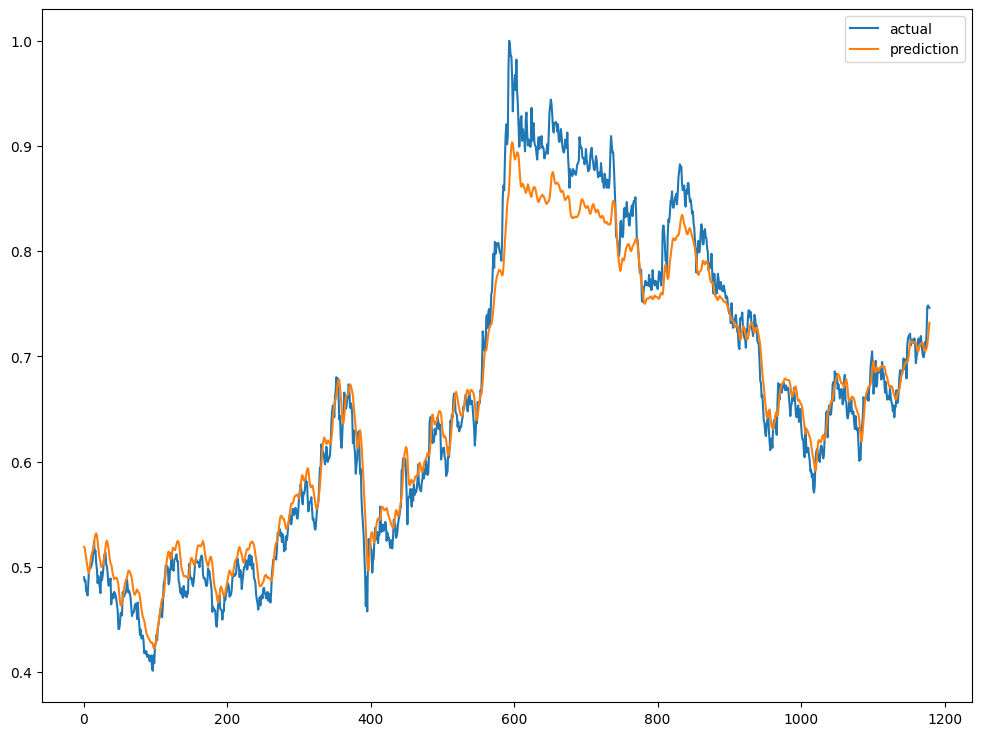

In [29]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [32]:
pred.shape

(1180, 1)